# Assignment-06-Logistic Regression

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the dataset
bank=pd.read_csv('bank-full.csv',sep =';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23905,34,technician,divorced,secondary,no,7.0,yes,yes,cellular,29.0,aug,273.0,2.0,-1.0,0.0,unknown,no
23906,45,blue-collar,married,primary,no,492.0,no,no,cellular,29.0,aug,141.0,2.0,-1.0,0.0,unknown,no
23907,32,management,married,tertiary,no,500.0,no,yes,cellular,29.0,aug,107.0,2.0,-1.0,0.0,unknown,no
23908,49,management,married,tertiary,no,146.0,no,no,cellular,29.0,aug,86.0,2.0,-1.0,0.0,unknown,no


# EDA

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23910 entries, 0 to 23909
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        23910 non-null  int64  
 1   job        23910 non-null  object 
 2   marital    23910 non-null  object 
 3   education  23910 non-null  object 
 4   default    23910 non-null  object 
 5   balance    23909 non-null  float64
 6   housing    23909 non-null  object 
 7   loan       23909 non-null  object 
 8   contact    23909 non-null  object 
 9   day        23909 non-null  float64
 10  month      23909 non-null  object 
 11  duration   23909 non-null  float64
 12  campaign   23909 non-null  float64
 13  pdays      23909 non-null  float64
 14  previous   23909 non-null  float64
 15  poutcome   23909 non-null  object 
 16  y          23909 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 3.1+ MB


In [5]:
bank.shape

(23910, 17)

In [6]:
# One-Hot Encoding of categrical variables
bank=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,...,1,0,0,0,1,1,0,0,0,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23905,34,no,7.0,yes,yes,29.0,273.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0
23906,45,no,492.0,no,no,29.0,141.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0
23907,32,no,500.0,no,yes,29.0,107.0,2.0,-1.0,0.0,...,1,0,1,0,0,1,1,0,0,0
23908,49,no,146.0,no,no,29.0,86.0,2.0,-1.0,0.0,...,1,0,1,0,0,1,1,0,0,0


In [7]:
# To see all columns
pd.set_option("display.max.columns", None)
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23905,34,no,7.0,yes,yes,29.0,273.0,2.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
23906,45,no,492.0,no,no,29.0,141.0,2.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
23907,32,no,500.0,no,yes,29.0,107.0,2.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
23908,49,no,146.0,no,no,29.0,86.0,2.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [8]:
# Removing NA values in data set
bank = bank.dropna()
bank.shape

(23909, 38)

In [9]:
# Custom Binary Encoding of Binary o/p variables 
bank['default'] = np.where(bank['default'].str.contains("yes"), 1, 0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"), 1, 0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"), 1, 0)
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)
bank

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,0,2143.0,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,0,29.0,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,0,2.0,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,0,1506.0,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,0,1.0,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,31,0,315.0,0,0,29.0,109.0,4.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
23905,34,0,7.0,1,1,29.0,273.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
23906,45,0,492.0,0,0,29.0,141.0,2.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
23907,32,0,500.0,0,1,29.0,107.0,2.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23909 entries, 0 to 23908
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  23909 non-null  int64  
 1   default              23909 non-null  int64  
 2   balance              23909 non-null  float64
 3   housing              23909 non-null  int64  
 4   loan                 23909 non-null  int64  
 5   day                  23909 non-null  float64
 6   duration             23909 non-null  float64
 7   campaign             23909 non-null  float64
 8   pdays                23909 non-null  float64
 9   previous             23909 non-null  float64
 10  y                    23909 non-null  int64  
 11  job_admin.           23909 non-null  uint8  
 12  job_blue-collar      23909 non-null  uint8  
 13  job_entrepreneur     23909 non-null  uint8  
 14  job_housemaid        23909 non-null  uint8  
 15  job_management       23909 non-null 

# Model Building

In [11]:
# Dividing our data into input and output variables
x=pd.concat([bank.iloc[:,0:10],bank.iloc[:,11:]],axis=1)
y=bank.iloc[:,10]

In [12]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Model Predictions

In [13]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
23904,0,0
23905,0,0
23906,0,0
23907,0,0


# Testing Model Accuracy

In [15]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[22548,   230],
       [  769,   362]])

In [16]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(9896+96)/(9896+80+271+96)

0.9660640046408199

In [17]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22778
           1       0.61      0.32      0.42      1131

    accuracy                           0.96     23909
   macro avg       0.79      0.65      0.70     23909
weighted avg       0.95      0.96      0.95     23909



In [18]:
# As accuracy = 0.96606, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1] 

array([0.00362097, 0.00361844, 0.00497063, ..., 0.01818565, 0.02699585,
       0.01040407])

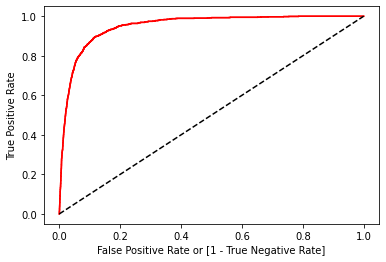

auc accuracy: 0.6549866357000282


In [19]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [20]:
y_prob1 = pd.DataFrame(classifier.predict_proba(x)[:,1]) 
y_prob1                              

,0
0,0.003621
1,0.003618
2,0.004971
3,0.002981
4,0.021891
...,...
23904,0.030097
23905,0.041738
23906,0.018186
23907,0.026996
